# Inaugural project

Imports and set magics

In [2]:
import numpy as np
import math

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
#import inauguralproject

# Question 1

$
m: endowment \\
c: composite \ good\\
h: housing \ quality\\
p_h: price \ of \ house \ with \ quality \ h\\
$

Household chooses consumption of housing and the composite good such that its utility is maximized:

$
\begin{align*}
c^*, h^* = arg \ max_{c,h} \ c^{1-\phi} h^{\phi}
\end{align*}
$



In [3]:
para = {'phi': 0.3, 'eps': 0.5, 'r': 0.03, 'tau_g': 0.012, 'tau_p': 0.004, 'p_bar': 3, 'p_c': 1}
print(para)

{'phi': 0.3, 'eps': 0.5, 'r': 0.03, 'tau_g': 0.012, 'tau_p': 0.004, 'p_bar': 3, 'p_c': 1}


In [4]:
def utility_function(c, h, para):
    '''returns utility for a given c, h, and phi'''
    u = c**(1-para['phi'])*h**(para['phi'])
    return u
print(utility_function(1,1, para))

1.0


In [5]:
def exp_housing(p_h, para):
    '''returns the costs of buying a house of quality h'''
    exp_housing= para['r'] * p_h + para['tau_g'] * (p_h * para['eps']) + para['tau_p'] * max((p_h * para['eps'] - para['p_bar'], 0))
    return exp_housing
print(exp_housing(1, para))

0.036


In [6]:
def expenditures(p_h, c, para):
    '''returns the expenditures of the consumption bundle'''
    E = exp_housing(p_h, para) + c
    return E
print(expenditures(1,1, para))

1.036


## Solve like Lasse: Multi-dimensional constrained solver

In [7]:
from scipy import optimize

def value_of_choice(x, para, m):
    c = x[0]
    h = x[1]
    return -utility_function(c, h, para) #minus to take the negative of the utility because optimization always minimizes


In [8]:
# constraint function (negative if violated)
constraints = ({'type': 'ineq', 'fun': lambda x: m-
                ( x[0] +  para['r'] * x[1] + para['tau_g'] * x[1] * para['eps'] + para['tau_p'] * max(x[1] * para['eps'] - para['p_bar'], 0))})
 
m=0.5
# call optimizer
initial_guess = [m/2, m/2] # some guess, should be feasible
 
res = optimize.minimize(value_of_choice,initial_guess, args=(para, m), method='SLSQP',constraints=constraints)


c_best = res.x[0]
h_best = res.x[1]
u_best = utility_function(c_best, h_best, para)

# c. print result

print(f'The optimal consumption level is: {c_best:.4f}')

print(f' The optimal house quality is: {h_best:.4f}')

print(f' The utility is: {u_best:.4f}')

The optimal consumption level is: 0.3500
 The optimal house quality is: 4.1653
 The utility is: 0.7358


# Question 2

In [53]:
import numpy as np
import matplotlib.pyplot as plt # baseline modul

#Data containers
c_star = []
h_star = []
x_axis = []
# loop 100 values between 0.4 and 2.5, 2.5 included
for m in np.linspace(0.4,2.5,num=100,endpoint=True):

    #solution model from assingment 1.
    sol_case = optimize.minimize(
    value_of_choice,initial_guess,args=(para,m),
    method='SLSQP',constraints=constraints)

    c = sol_case.x[0]
    h= sol_case.x[1]
    
   # print(c)

    #appending the results to the data containers 
    c_star.append(c)
    h_star.append(h)
    x_axis.append(m)
    


0.28001147239271823
0.2948651593473346
0.3097200732512214
0.3245765538555443
0.33943500131073434
0.3542960478949068
0.3691603827904787
0.38402905811604454
0.3989030254457231
0.41378360769839806
0.42867202491061135
0.44356947480179065
0.45847739139258387
0.47303556968690497
0.4878859879341219
0.5027370310793139
0.5233815891111668
0.5407707477688241
0.5558171036122915
0.5705273522442869
0.5853784824770354
0.6002305453746187
0.6150839651030952
0.6299383074788739
0.6448260916072283
0.6596869420158604
0.6745496445927298
0.689413159631146
0.7042720775818677
0.7191324652967279
0.7339945163273601
0.7488585051704428
0.7637242947345929
0.7785925484641261
0.7934631462462487
0.8083367116841076
0.8232130399736164
0.8380926514753438
0.8529754113168013
0.8678618345362664
0.8827517589474732
0.8971926789526214
0.9120420472762951
0.926891526303558
0.941741048665998
0.9565907292463681
0.9714403535457335
0.9862903595127221
1.0011403831556145
1.015991001745197
1.0308411436299956
1.0456920877845022
1.060542

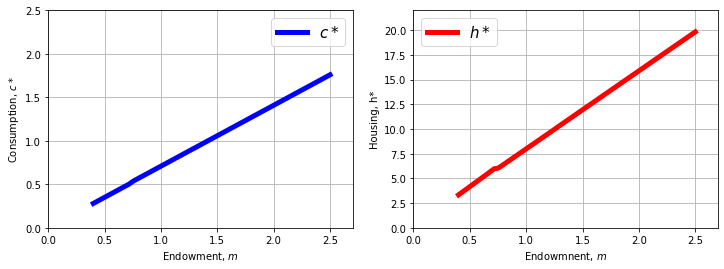

In [10]:

    


#initialising the figuere
fig = plt.figure(figsize=(12,4))

# Optimal consumption
ax = fig.add_subplot(1,2,1)
ax.plot(x_axis, c_star, color='blue', label="$c*$", linewidth=5)
ax.set_ylabel('Consumption, $c*$')
ax.set_xlabel('Endowment, $m$')

# adding legend
plt.legend(loc='best', fontsize=15)

# costumizing end and begining of x and y axis
ax.set_xlim([0,2.7])
ax.set_ylim([0,2.5])
ax.grid(True)


# Optimal housing
ax = fig.add_subplot(1,2,2)
ax.plot(x_axis, h_star, color='red', label="$h*$", linewidth=5)
ax.set_ylabel('Housing, h*')
ax.set_xlabel('Endowmnent, $m$')

# adding legend
plt.legend(loc='best', fontsize=15)

# costumizing end and begining of x and y axis.
ax.set_xlim([0,2.7])
ax.set_ylim([0,22])
ax.grid(True)

## Question 3

In [228]:
#def c_func(x):
 #   c=x[0]
  #  return c

In [229]:
#def h_func(x):
 #   h=x[1]
  #"  return h

In [236]:
#def demand_h(para):
 #   m = x[0] + para['r'] * x[1] + para['tau_g'] * x[1] * para['eps'] + para['tau_p'] * max(x[1] * para['eps'] - para['p_bar'], 0)*h
  #  return para['phi']*m/(para['r'] * x[1] + para['tau_g'] * x[1] * para['eps'] + para['tau_p'] * max(x[1] * para['eps'] - para['p_bar'], 0))

In [11]:
np.random.seed(1)
m_i = np.random.lognormal(mean=-0.4,sigma=0.35,size=10000)
print (m_i)

[1.18355294 0.54111971 0.5571838  ... 0.47003396 0.65577097 0.40524864]


In [59]:
c_optimal = []
h_optimal = []

np.random.seed(1)
for m in np.random.lognormal(mean= -0.4,sigma = 0.35,size=10000):
    
    sol_tax = optimize.minimize(
    value_of_choice,initial_guess,args=(para,m),
    method='SLSQP',constraints=constraints)

    c_best = sol_tax.x[0]
    h_best= sol_tax.x[1]
    
   #print(c_best)
    #print(h_best)
    
    c_optimal.append(c_best)
    h_optimal.append(h_best)
    


In [256]:
#def tax_indiv(p_h_i, para):
 #   tax_indiv = para['tau_g']*p_h_i + max(p_h_i - para['p_bar'],0) 
  #  return tax_indiv
#print(tax_indiv)

<function tax_indiv at 0x000001B1A926ADC0>


In [254]:
 #def tax_return(p_h_i, para):
  #      indiv=tax_indiv(p_h_i, para)
   #     tax_return=indiv.sum()
    #    return tax_return
#print(tax_return)

<function tax_return at 0x000001B1A9212550>


In [23]:
tax = 0

for val in h_optimal:
    taxreturn = para['tau_g']*val + para['tau_p']*max(val - para['p_bar'],0) 
    tax += taxreturn

print(tax)

812.7491280744767


In [24]:
N=10000
tax_per_hh=tax/N
print(tax_per_hh)

0.08127491280744767


## Optional question: Plotting the distributions

(array([0.04473041, 0.06709562, 0.1304637 , 0.25347233, 0.37648096,
        0.52930987, 0.82005754, 0.92070097, 1.18908344, 1.32327467,
        1.60283974, 1.62147741, 1.59538467, 1.79294399, 1.84140193,
        1.67366289, 1.75194111, 1.67366289, 1.72957591, 1.45373837,
        1.42764563, 1.41273549, 1.20026604, 1.17044576, 0.98779658,
        0.9132459 , 0.94306617, 0.77905466, 0.70450398, 0.59267795,
        0.59267795, 0.49203452, 0.45103165, 0.3913911 , 0.4025737 ,
        0.34666069, 0.24601726, 0.24228973, 0.18264918, 0.14910137,
        0.17892165, 0.09318836, 0.16028397, 0.12300863, 0.05964055,
        0.07455069, 0.07455069, 0.09691589, 0.05218548, 0.04845795,
        0.04100288, 0.01491014, 0.02609274, 0.01491014, 0.02982027,
        0.02236521, 0.02609274, 0.01863767, 0.0111826 , 0.00745507,
        0.02609274, 0.00372753, 0.        , 0.00745507, 0.00745507,
        0.00745507, 0.00372753, 0.00372753, 0.        , 0.00372753,
        0.        , 0.        , 0.        , 0.  

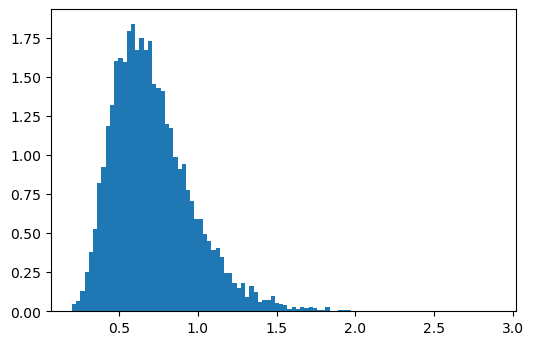

In [28]:
M = np.random.lognormal(mean= -0.4,sigma = 0.35,size=10000)

fig = plt.figure(dpi=100) #Dots per inches (dpi) determines how many pixels the figure comprises. The default dpi in matplotlib is 100.
ax = fig.add_subplot(1,1,1)
ax.hist(M,bins=100,density=True,label='normal')



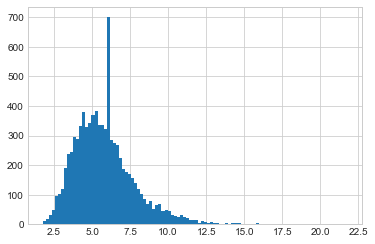

In [289]:
import matplotlib.pyplot as plt
plt.hist(h_optimal, bins=100)
plt.show()
#for i,h_now in enumerate(h_optimal):
 #   fig=plt.figure(dpi=100)
  #  ax.fig.add_subplot(1,1,1)
   # ax.hist(h_now,density=True,alpha=0.5,label=f'$p_1 = {p1}$')

# Question 4

In [31]:
para_new = {'phi': 0.3, 'eps': 0.8, 'r': 0.03, 'tau_g': 0.01, 'tau_p': 0.009, 'p_bar': 8, 'p_c': 1}
print(para_new)

{'phi': 0.3, 'eps': 0.8, 'r': 0.03, 'tau_g': 0.01, 'tau_p': 0.009, 'p_bar': 8, 'p_c': 1}


In [32]:
def value_of_choice_new(x_new, para_new, m):
    c = x_new[0]
    h = x_new[1]
    return -utility_function(c, h, para_new) #minus to take the negative of the utility because optimization always minimizes

In [33]:
constraints_new = ({'type': 'ineq', 'fun': lambda x_new: m-
                ( x_new[0] +  para_new['r'] * x_new[1] + para_new['tau_g'] * x_new[1] * para_new['eps'] + para_new['tau_p'] * max(x_new[1] * para_new['eps'] - para_new['p_bar'], 0))})

In [34]:
np.random.seed(1)
m_i = np.random.lognormal(mean=-0.4,sigma=0.35,size=10000)
print (m_i)

[1.18355294 0.54111971 0.5571838  ... 0.47003396 0.65577097 0.40524864]


In [72]:
c_optimal_new = [0]
h_optimal_new = [0]

np.random.seed(1)
for m in np.random.lognormal(mean= -0.4,sigma = 0.35,size=10000):
    
    sol_tax_new = optimize.minimize(
    value_of_choice_new,initial_guess,args=(para_new,m),
    method='SLSQP',constraints=constraints_new)

    c_best_new = sol_tax_new.x[0]
    h_best_new = sol_tax_new.x[1]
    
    #print(c_best_new)
    
    c_optimal_new.append(c_best_new)
    h_optimal_new.append(h_best_new)
    


In [68]:
tax_new = 0

for i, val in enumerate(h_optimal_new):
    taxreturn_new = para_new['tau_g']*val + para_new['tau_p']*max(val - para_new['p_bar'],0) 
    tax_new += taxreturn_new

print(tax_new)

575.5368468717257


In [69]:
tax_per_hh_new=tax_new/N
print(tax_per_hh_new)

0.05755368468717258


# Question 5

In [85]:
para_new2 = {'phi': 0.3, 'eps': 0.8, 'r': 0.03, 'tau_p': 0.009, 'p_bar': 8, 'p_c': 1}
print(para_new2)

{'phi': 0.3, 'eps': 0.8, 'r': 0.03, 'tau_p': 0.009, 'p_bar': 8, 'p_c': 1}


In [111]:
def value_of_choice_new2(x_new2, para_new2, m):
    c = x_new2[0]
    h = x_new2[1]
    return -utility_function(c, h, para_new2) #minus to take the negative of the utility because optimization always minimizes

In [112]:
N = 40
tau_g_vec = np.linspace(0,0.05,N)
f_vec = np.empty(N)

#f_best = np.inf # initial maximum
#tau_g_best = rev # revenue from Q3

for i,tau_g in enumerate(tau_g_vec):

    
    constraints2 = ({'type': 'ineq', 'fun': lambda x:  m- (x[0] + para_new2['r']*x[1] 
                                                      + tau_g *x[1]*para_new2['eps']
                                                      + para_new2['tau_p']*max(x[1]*para_new2['eps']
                                                                                -para_new2['p_bar'],0))})
    
    
    individual = []

    for m in np.random.lognormal(mean=-0.4, sigma=0.35, size=10000):
    

        sol = optimize.minimize(
        value_of_choice,initial_guess,args=(para_new2,m),
        method='SLSQP',constraints=constraints2)

        c_ = sol.x[0]
        h_ = sol.x[1]


        taxx = tau_g *h_ + para_new2['tau_p']*max(h_-para_new2['p_bar'],0)
        
        individual.append(taxx)
        
    r =sum(individual)
    
    if 812 <=r <= 813:
        print(tau_g)
    
   
    
    #diff = r-812.7491280744767
    #if  -0.00000001 <= diff <= 0.0000000001:
     #   tau_g_best = tau_g
        
#print(f'best with loop tau_p = {tau_g_best:.8f}')

<ipython-input-4-e04788e5b977>:3: RuntimeWarning: invalid value encountered in double_scalars
  u = c**(1-para['phi'])*h**(para['phi'])
